In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.src.common.enums.enum import (
    MapLayerType,
    ObjectSize,
    GateType,
    TemplateTypes,
    ObjectRotation,
    YamlReplacementKeywords,
    CheckPlacementReturnTypes,
)

from aoe2mapgenerator.src.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.src.common.constants.constants import (
    DEFAULT_EMPTY_VALUE,
    BASE_SCENE_DIR_LINUX,
    BASE_SCENARIO_NAME,
    TEMPLATE_DIR_LINUX,
)
from aoe2mapgenerator.src.common.constants.default_objects import (
    GHOST_OBJECT_DISPLACEMENT,
    DEFAULT_EMPTY_OBJECT,
)
from aoe2mapgenerator.src.common.enums.enum import GateType
import multiprocessing as mp
from aoe2mapgenerator.src.map.map import Map
import os
from aoe2mapgenerator.src.serializer.serializer import (
    _convert_map_value_to_string,
    _get_enum_list,
    _recursive_parse_enum_to_string,
    serialize_map,
    get_all_functions_and_arguments,
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string,
)
from aoe2mapgenerator.src.triggers.triggers import TriggerObject
from aoe2mapgenerator.src.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from aoe2mapgenerator.src.units.wallgenerators.voronoi import VoronoiGenerator
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
from aoe2mapgenerator.src.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.src.units.placers.group_placer import GroupPlacerManager
from aoe2mapgenerator.src.units.placers.point_manager import PointManager
from aoe2mapgenerator.src.testing import awesome_function
from aoe2mapgenerator.src.map.map_object import MapObject
from aoe2mapgenerator.src.units.placers.point_selector import PointSelector
from aoe2mapgenerator.src.visualizer.visualizer import Visualizer
from aoe2mapgenerator.src.units.placers.gate_placer import GatePlacer
from aoe2mapgenerator.src.units.placers.wall_placer import WallPlacer
from aoe2mapgenerator.src.map.map_manager import MapManager
from aoe2mapgenerator.src.units.placers.placer_configs import *
from aoe2mapgenerator.src.units.placers.placer_configs import PlaceGroupsConfig
import dataclasses
import json

from aoe2mapgenerator.src.units.utils import connect_points_with_randomization

In [2]:
n = 256
map_manager = MapManager(n)
# This setup is kinda ugly for the point
# point_selector = PointSelector(map_manager.get_map())

In [3]:
village_center = (150, 150)

# map_manager.base_placer.place_single(
#     point_manager=map_manager.point_manager,
#     map_layer_type=MapLayerType.UNIT,
#     point=(50,50),
#     object_type=BuildingInfo.TOWN_CENTER,
# )

points = map_manager.point_selector.get_points_in_range(
    PointSelectorInRangeConfig(
        map_layer_type=MapLayerType.UNIT,
        object_type=DEFAULT_EMPTY_OBJECT,
        min_range=40,
        max_range=50,
        points_to_be_in_range_of=[village_center],
    )
)

In [4]:
map_manager.point_manager.add_points(points)

all_placements = map_manager.place_groups(
    PlaceGroupsConfig(
        point_manager=map_manager.point_manager,
        map_layer_type=MapLayerType.UNIT,
        object_type=BuildingInfo.HOUSE,
        group_size=5,
        groups=5,
        clumping=15,
    )
)

In [5]:
map_manager.point_manager.clear()
map_manager.point_manager.add_points([(i, j) for i in range(n) for j in range(n)])

In [6]:
all_placements["group_centers"][0]

(161, 111)

In [7]:
for i, center in enumerate(all_placements["group_centers"]):

    key_points = [village_center, center]

    points = connect_points_with_randomization(key_points, 5, 3)
    # points = connect_points_with_randomization(key_points, 8, 5, points)
    # points = connect_points_with_randomization(key_points, 32, 3, points)
    # points = connect_points_with_randomization(key_points, 64, 1, points)

    for point in points:
        map_manager.base_placer.place_closest_to_point(
            map_manager.point_manager,
            map_layer_type=MapLayerType.TERRAIN,
            starting_point=point,
            obj_type=TerrainId.ROAD_FUNGUS,
            player_id=PlayerId.GAIA,
        )

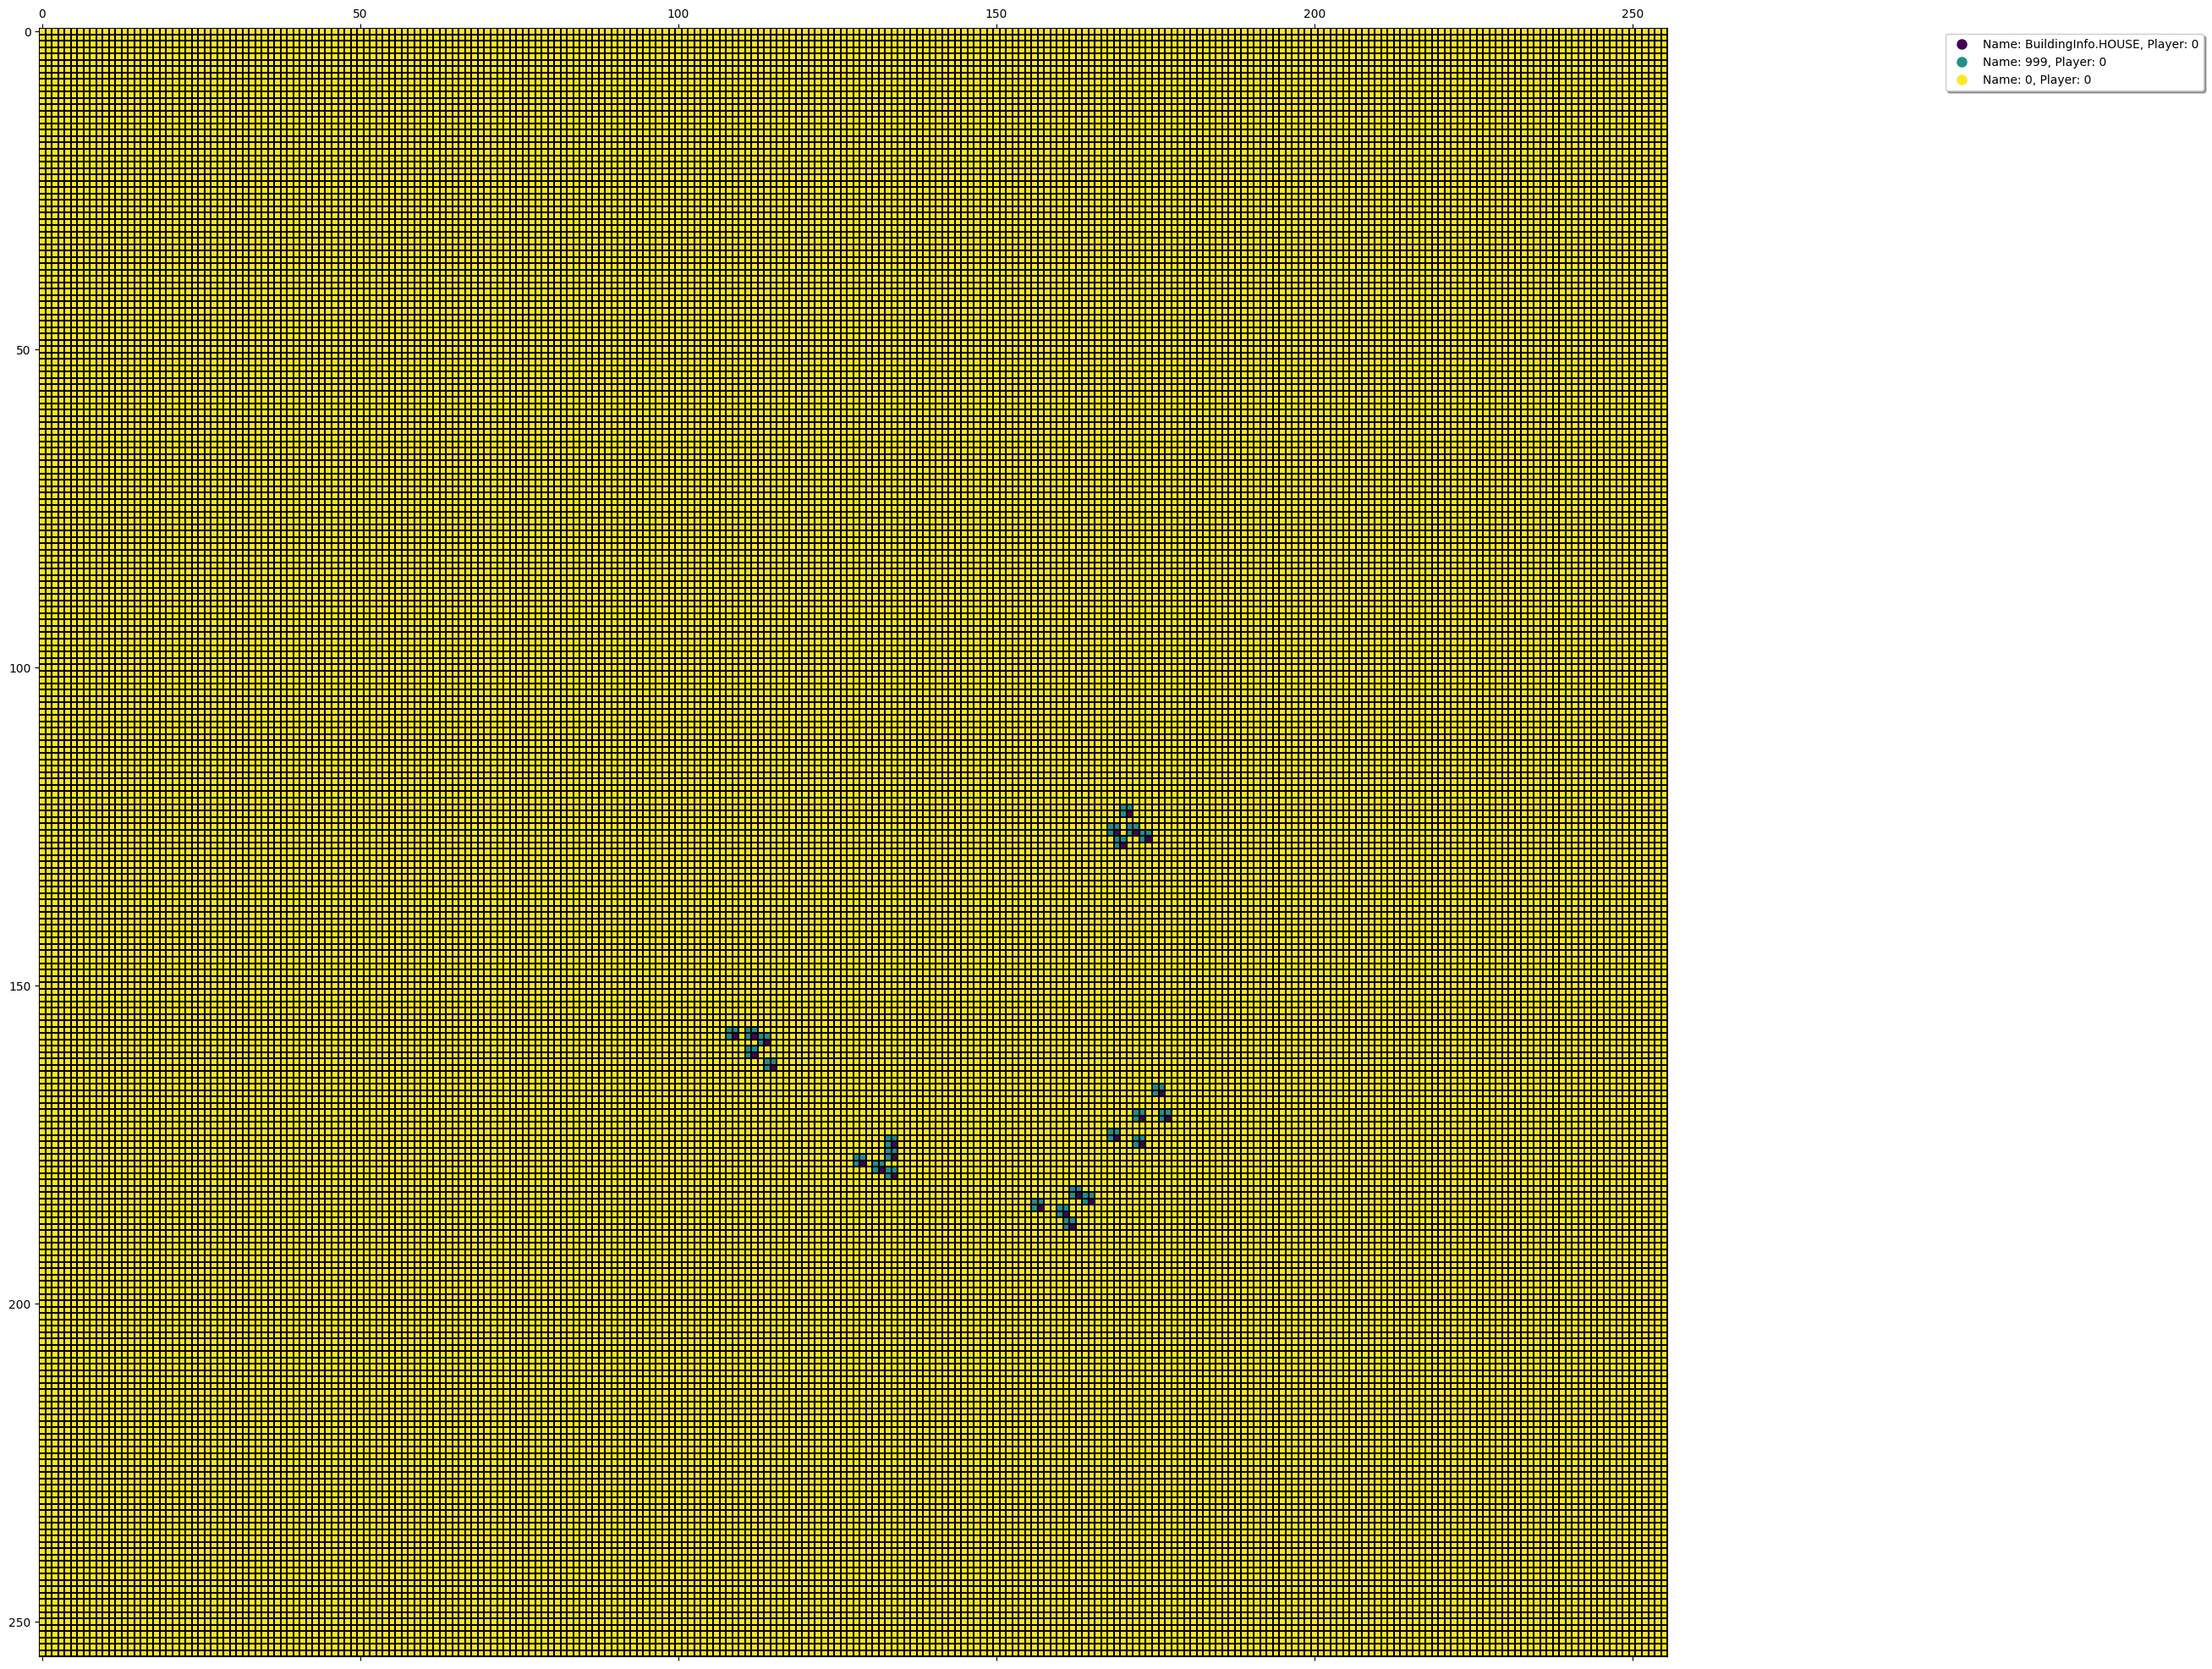

In [10]:
map_manager.visualize_map(
    VisualizeMapConfig(map_layer_type=MapLayerType.UNIT, fig_size=(25, 25))
)

In [37]:
scen = Scenario(aoe2_map=map_manager.get_map())
scen.write_map()
scen._change_map_size(n)
scen.save_file(os.path.join(BASE_SCENE_DIR_LINUX, "village_test.aoe2scenario"))


[21:54:06] Reading file: '/home/joseph/.steam/steam/steamapps/compatdata/813780/pfx/dosdevices/c:/users/steamuser/Games/Age of Empires 2 DE/76561198242754748/resources/_common/scenario/BASE_SCENARIO.aoe2scenario'
[21:54:06] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.53
>>> Scenario variant: 'Age of Empires 2'
##########################################

[21:54:06] Loading scenario structure finished successfully.
[21:54:06] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
[21:54:08] Parsing scenario file finished successfully.

[21:54:08] Setting up managers ...